In [2]:
import pandas as pd
pima=pd.read_csv("/content/drive/MyDrive/Personal/Studies/MSC Data Science Material/SEM2/ML/Practical/data_set/diabetes.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable 
feature_cols=["Pregnancies", "Insulin", "BMI", "Age", "Glucose", "BloodPressure", "DiabetesPedigreeFunction"]
x = pima[feature_cols]
y = pima.Outcome #Target Variable

In [5]:
#splitting x and y into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg=LogisticRegression()

#fit the model with data
logreg.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
#predict the model
y_pred=logreg.predict(x_test)

In [8]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#diagonal values are accurate prediction

array([[117,  13],
       [ 24,  38]])

In [9]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted Label')

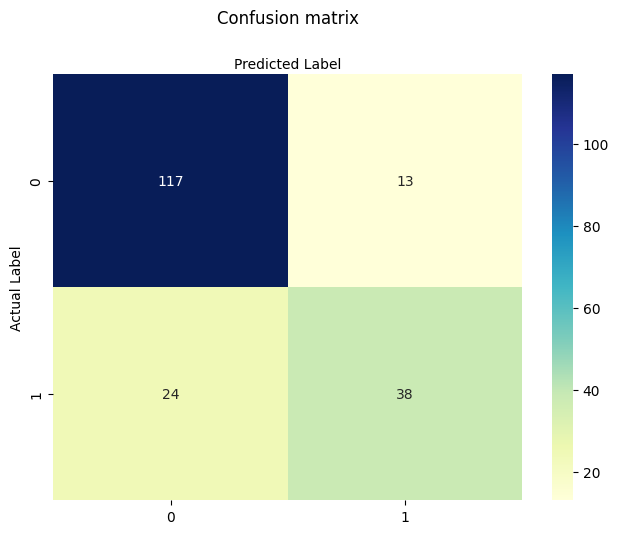

In [10]:
class_names=[0,1] #name of the classes
fig, ax=mtp.subplots()
tick_marks = np.arange(len(class_names))
mtp.xticks(tick_marks, class_names)
mtp.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
mtp.tight_layout()
mtp.title("Confusion matrix", y=1.1)
mtp.ylabel("Actual Label")
mtp.xlabel("Predicted Label")